In [1]:
from scipy.io.arff import loadarff
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
fp= '../Dataset/Day1.TCP.arff'
raw_data = loadarff(fp)

In [3]:
df=pd.DataFrame(raw_data[0])
df

,1,2,45,59,60,83,86,95,96,113,162,180,249
0,25.0,52373.0,0.0,0.0,1.0,0.0,91.0,0.0,92.0,1.0,40.0,3528.000000,b'MAIL'
1,25.0,52945.0,0.0,0.0,1.0,0.0,91.0,0.0,92.0,1.0,40.0,3528.000000,b'MAIL'
2,25.0,53559.0,0.0,0.0,1.0,0.0,91.0,0.0,92.0,1.0,40.0,3528.000000,b'MAIL'
3,25.0,53803.0,0.0,0.0,1.0,0.0,91.0,0.0,92.0,1.0,40.0,3528.000000,b'MAIL'
4,25.0,58400.0,1.0,1.0,1.0,35.0,64.0,35.0,65.0,1.0,48.0,1740.500000,b'MAIL'
...,...,...,...,...,...,...,...,...,...,...,...,...,...
324272,80.0,1491.0,1.0,1.0,0.0,259.0,0.0,259.0,0.0,2.0,48.0,0.000000,b'WWW'
324273,80.0,1490.0,1.0,1.0,0.0,263.0,0.0,263.0,0.0,2.0,48.0,0.000000,b'WWW'
324274,80.0,1489.0,1.0,1.0,0.0,263.0,0.0,263.0,0.0,2.0,48.0,0.000000,b'WWW'
324275,80.0,1488.0,1.0,1.0,0.0,263.0,0.0,263.0,0.0,2.0,48.0,0.000000,b'WWW'


In [4]:
print("For the Dataset:\n",df['249'].value_counts(),"\n")

For the Dataset:
 b'WWW'            274977
b'MAIL'            28124
b'BULK'            12151
b'DATABASE'         2794
b'P2P'              2085
b'SERVICES'         1808
b'ATTACK'           1751
b'MULTIMEDIA'        496
b'INTERACTIVE'        86
b'GAMES'               5
Name: 249, dtype: int64 



In [5]:
print(list(df.columns))

['1', '2', '45', '59', '60', '83', '86', '95', '96', '113', '162', '180', '249']


In [6]:
df['249'] = df['249'].replace([b'WWW'],1).replace([b'MAIL'],2).replace([b'BULK'],3).replace(
[b'DATABASE'],4).replace([b'P2P'],5).replace([b'SERVICES'],6).replace([b'ATTACK'],7).replace(
[b'MULTIMEDIA'],8).replace([b'INTERACTIVE'],9).replace([b'GAMES'],10)

In [7]:
print("For the Dataset:\n",df['249'].value_counts(),"\n")

For the Dataset:
 1     274977
2      28124
3      12151
4       2794
5       2085
6       1808
7       1751
8        496
9         86
10         5
Name: 249, dtype: int64 



In [8]:
np.any(np.isnan(df))
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

clean_dataset(df)

,1,2,45,59,60,83,86,95,96,113,162,180,249
0,25.0,52373.0,0.0,0.0,1.0,0.0,91.0,0.0,92.0,1.0,40.0,3528.000000,2.0
1,25.0,52945.0,0.0,0.0,1.0,0.0,91.0,0.0,92.0,1.0,40.0,3528.000000,2.0
2,25.0,53559.0,0.0,0.0,1.0,0.0,91.0,0.0,92.0,1.0,40.0,3528.000000,2.0
3,25.0,53803.0,0.0,0.0,1.0,0.0,91.0,0.0,92.0,1.0,40.0,3528.000000,2.0
4,25.0,58400.0,1.0,1.0,1.0,35.0,64.0,35.0,65.0,1.0,48.0,1740.500000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
324272,80.0,1491.0,1.0,1.0,0.0,259.0,0.0,259.0,0.0,2.0,48.0,0.000000,1.0
324273,80.0,1490.0,1.0,1.0,0.0,263.0,0.0,263.0,0.0,2.0,48.0,0.000000,1.0
324274,80.0,1489.0,1.0,1.0,0.0,263.0,0.0,263.0,0.0,2.0,48.0,0.000000,1.0
324275,80.0,1488.0,1.0,1.0,0.0,263.0,0.0,263.0,0.0,2.0,48.0,0.000000,1.0


In [9]:
np.any(np.isnan(df))

False

In [10]:
X=df.drop(columns=["249"])
y=df["249"]

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
random_state=1
randomForest = RandomForestClassifier(random_state = random_state)
decisionTree = DecisionTreeClassifier(random_state = random_state)

In [13]:
randomForest.fit(X_train, y_train)
print("Random Forest fitted")
decisionTree.fit(X_train, y_train)
print("Decision Tree fitted")

Random Forest fitted
Decision Tree fitted


In [14]:
randomForestResult = randomForest.score(X_test, y_test)
decisionTreeResult = decisionTree.score(X_test, y_test)

In [15]:
print('Random Forest: {:.2f}'.format(randomForestResult))
print('Decision Tree: {:.2f}'.format(decisionTreeResult))

Random Forest: 1.00
Decision Tree: 1.00


In [16]:
from sklearn.metrics import precision_score
y_pred = decisionTree.predict(X_test)
y_score = decisionTree.score(X_test, y_test)
print('Accuracy: ', y_score)

# Compute the average precision score
from sklearn.metrics import precision_score
micro_precision = precision_score(y_pred, y_test, average='micro')
print('Micro-averaged precision score: {0:0.2f}'.format(
      micro_precision))

macro_precision = precision_score(y_pred, y_test, average='macro')
print('Macro-averaged precision score: {0:0.2f}'.format(
      macro_precision))

per_class_precision = precision_score(y_pred, y_test, average=None)
print('Per-class precision score:', per_class_precision)

Accuracy:  0.9974712430998859
Micro-averaged precision score: 1.00
Macro-averaged precision score: 0.88
Per-class precision score: [0.99876337 0.99964814 0.99415449 0.99475524 0.96836983 0.99715909
 0.82738095 0.97938144 1.         0.        ]


In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [18]:
print(f1_score(y_test, decisionTree.predict(X_test), average="macro"))

0.8763638697757392


In [19]:
pipeline = make_pipeline(StandardScaler(),
RandomForestClassifier(n_estimators=10, max_features=5, max_depth=2, random_state=1))
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=2, max_features=5,
                                        n_estimators=10, random_state=1))])

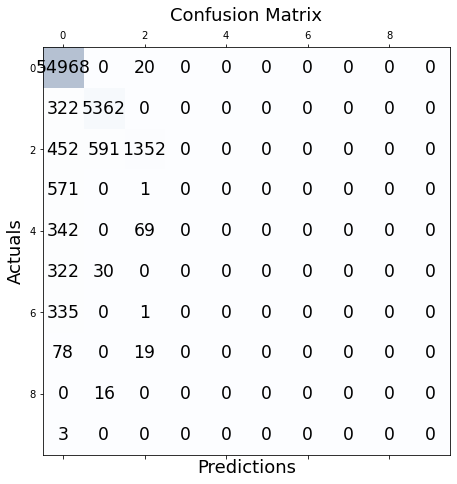

In [20]:
y_pred = pipeline.predict(X_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MultiLabelBinarizer
#multilabel_binarizer = MultiLabelBinarizer()
#multilabel_binarizer.fit(df)
#labels = multilabel_binarizer.classes_

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import GRU
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.metrics import CategoricalAccuracy, Precision, Recall
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from keras.callbacks import History

In [23]:
X_train=np.array(X_train)
print("Type: ", type(X_train))
print("Type: ", type(y_train))
print("X train shape: ",X_train.shape)
print("X test shape: ",(X_test.shape))
print("Y train shape: ",y_train.shape)

Type:  <class 'numpy.ndarray'>
Type:  <class 'pandas.core.series.Series'>
X train shape:  (259413, 12)
X test shape:  (64854, 12)
Y train shape:  (259413,)


In [27]:
model = Sequential()
model.add(Dense(8,input_dim=12,activation="relu"))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [28]:
X_train = np.array(X_train)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 104       
                                                                 
 dense_5 (Dense)             (None, 4)                 36        
                                                                 
 dense_6 (Dense)             (None, 2)                 10        
                                                                 
 dense_7 (Dense)             (None, 1)                 3         
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(X_train,np.array(y_train),epochs =10 )

Epoch 1/10
8107/8107 [==============================] - 7s 823us/step - loss: -475546368.0000 - acc: 0.8480
Epoch 2/10
8107/8107 [==============================] - 7s 868us/step - loss: -7680986624.0000 - acc: 0.8480
Epoch 3/10
8107/8107 [==============================] - 7s 844us/step - loss: -37368233984.0000 - acc: 0.8480
Epoch 4/10
8107/8107 [==============================] - 7s 864us/step - loss: -113039187968.0000 - acc: 0.8480
Epoch 5/10
8107/8107 [==============================] - 7s 831us/step - loss: -265017032704.0000 - acc: 0.8480
Epoch 6/10
8107/8107 [==============================] - 8s 929us/step - loss: -526932672512.0000 - acc: 0.8480
Epoch 7/10
8107/8107 [==============================] - 7s 833us/step - loss: -950328492032.0000 - acc: 0.8480
Epoch 8/10
8107/8107 [==============================] - 7s 830us/step - loss: -1582380089344.0000 - acc: 0.8480
Epoch 9/10
8107/8107 [==============================] - 7s 855us/step - loss: -2474852220928.0000 - acc: 0.8480
Epoch